<a href="https://colab.research.google.com/github/hskim-py/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_8%EA%B0%95_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 8강

# 데이터 분석 방법론

## 8-1 통계적 모형을 활용한 분석 (statsmodels)

In [ ]:
!pip install statsmodels

In [4]:
import pandas as pd
import random
# statsmodels의 formula api 임포트
import statsmodels.formula.api as smf

## 난수 시드 설정
random.seed(1)

## 데이터 생성
X = list(range(1, 11))
y = [2*x + 1 + random.gauss(0, 1) for x in X]


## 데이터프레임 생성
data = pd.DataFrame({'X': X, 'y': y})
print(data)

## OLS(최소 제곱법) 회귀 모델 생성 및 학습
## 'y'를 종속 변수로 하고 다른 특성(X)을 독립 변수로 사용
## ~ 기준으로 왼쪽이 종속변수 오른쪽이 독립변수
model = smf.ols(formula='y ~ X', data=data).fit()

## 모델 요약 결과 출력
print(model.summary())

    X          y
0   1   4.288185
1   2   6.449446
2   3   7.066336
3   4   8.235456
4   5   9.907827
5   6  13.031335
6   7  13.977897
7   8  15.563171
8   9  19.199312
9  10  21.133375
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     345.0
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           7.28e-08
Time:                        12:44:59   Log-Likelihood:                -12.020
No. Observations:                  10   AIC:                             28.04
Df Residuals:                       8   BIC:                             28.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

## 8-2 기계학습을 활용한 분석 (scikit-learn)

In [16]:
# scikit-learn의 앙상블(ensemble) 알고리즘 중 RandomForestClassifier 임포트
from sklearn.ensemble import RandomForestClassifier
# 모델 평가를 위한 데이터 분할(split) 함수 임포트
from sklearn.model_selection import train_test_split
# 모델의 정확도(accuracy)를 측정하는 함수 임포트
from sklearn.metrics import accuracy_score
# 유방암 데이터셋을 로드하는 함수 임포트
from sklearn.datasets import load_breast_cancer
# 예제 데이터셋(유방암 데이터) 로드 함수 임포트


## 데이터 로드 및 분할
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

## 학습/테스트 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 랜덤 포레스트 모델 생성 및 학습
#n_estimators : ensemble 모델에서 몇개의 모델으로 부터 답을 취합할 것인가
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

## 예측 및 정확도 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)


Accuracy :  0.9649122807017544


## 8-3 딥러닝을 활용한 분석 (tensorflow)

In [17]:
from sklearn.metrics import classification_report
# 딥러닝 분석을 위한 tensorflow 임포트
import tensorflow as tf


## CIFAR-10 데이터셋 로드 및 전처리
## 비행기 고양이 강아지 등 사진을 보고 맞출 수 있는지
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## MobileNetV2 기반 모델 구축
## MoblieNetV2는 이미 학습된 모델임
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False
model = tf.keras.Sequential([
    tf.keras.layers.Resizing(160, 160),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

## 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 학습
model.fit(x_train, y_train, epochs=3, validation_split=0.2)

## 예측 및 성능 평가
y_pred = tf.argmax(model.predict(x_test), axis=1)
print("\nTest Accuracy:", model.evaluate(x_test, y_test, verbose=0)[1])
print("\nClassification Report:\n", classification_report(y_test, y_pred))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 617s 4us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.6941 - loss: 0.8976 - val_accuracy: 0.8083 - val_loss: 0.5547
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8190 - loss: 0.5244 - val_accuracy: 0.8165 - val_loss: 0.5271
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.8367 - loss: 0.4737 - val_accuracy: 0.8288 - val_loss: 0.5048
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step

Test Accuracy: 0.8220999836921692

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83      1000
           1       0.89      0.92      0.90      1000
           2       0.76      0.77      0.77      1000
           3       0.71      0.70      0.70      1000
           4       0.84      0.70      0.76      1000
           5       0.81      0.74      0.77      1000
           6       0.

## 8-4 EDA 예시

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

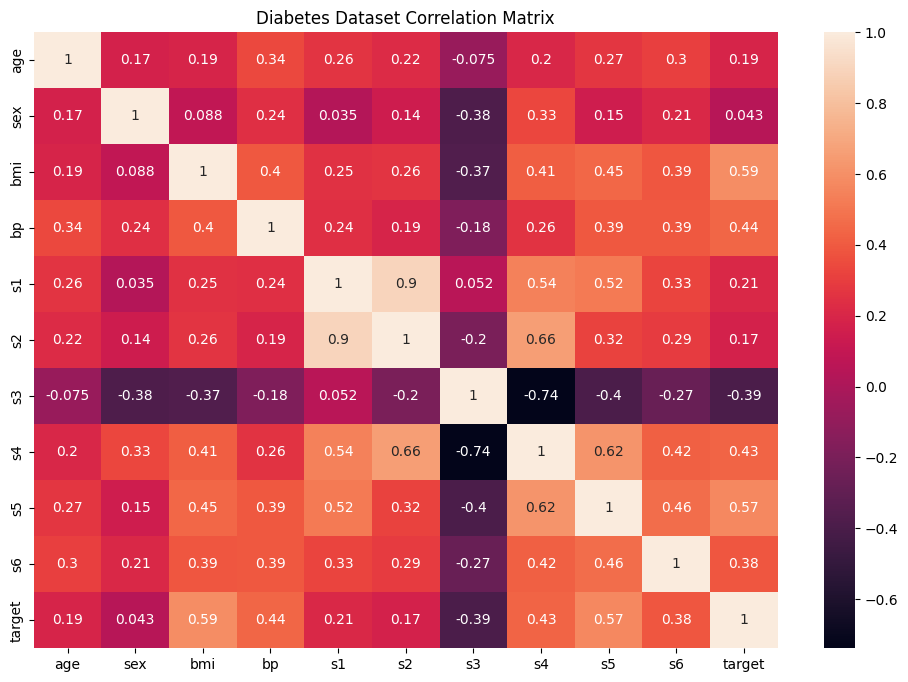

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

## 당뇨병 데이터셋 로드 및 데이터프레임 생성
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

## dataframe의 describe를 이용하여 기본 통계량 출력
print(df.describe())

## 상관 행렬 시각화
plt.figure(figsize=(12,8))
# dataframe의 각 열(변수)들 간의 상관 계수(correlation coefficient)를 계산하고 corr_matrix로 저장
corr_matrix = df.corr()
# seaborn으로 corr_matrix를 heatmap으로 시각화
sns.heatmap(corr_matrix, annot = True)
plt.title('Diabetes Dataset Correlation Matrix')
plt.show()

## 8-5 기술통계량 분석

In [22]:
import pandas as pd
import seaborn as sns

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

# 기술 통계량
print("=== 기본 통계량 ===")
print(df.describe())

# 데이터 미리보기
print("\n=== 데이터 미리보기 ===")
print(df.head())

# 그룹별 통계정보
print("\n=== 품종별 평균값 ===")
print(df.groupby('species').mean())

=== 기본 통계량 ===
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

=== 데이터 미리보기 ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

=== 품종별 평균값 ===
            sepal_length  

## 8-6 데이터 시각화 분석

In [23]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,828 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and dire

- 리소스 재시작

In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

/tmp/ipython-input-708027988.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-708027988.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=df, palette=colors)
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


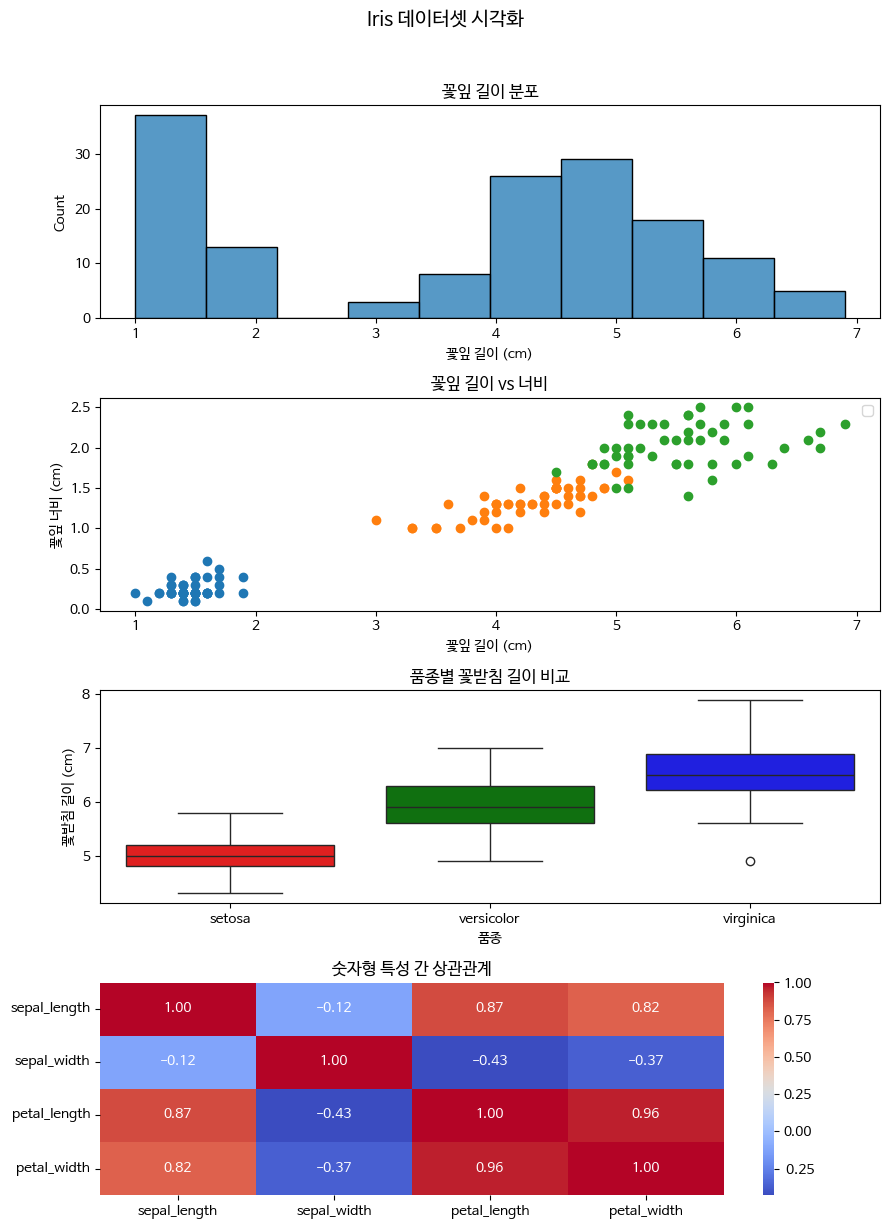

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 서브플롯 설정
plt.figure(figsize=(9, 12))
plt.suptitle('Iris 데이터셋 시각화', y=1.02, fontsize=14)

## 첫 번째 서브플롯: 꽃잎 길이 분포 (히스토그램)
plt.subplot(4, 1, 1)
# seaborn을 이용하여 petal_length를 10개 구간으로 나누어 히스토그램 표시
sns.histplot(df['petal_length'], bins=10)
plt.title('꽃잎 길이 분포')
plt.xlabel('꽃잎 길이 (cm)')

## 두 번째 서브플롯: 꽃잎 길이 vs 너비 (산점도)
plt.subplot(4, 1, 2)
species_list = df['species'].unique()
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species in species_list:
    species_data = df[df['species'] == species]
    # matplotlib를 이용하여 길이, 넓이를 산점도로 표시
    plt.scatter(species_data['petal_length'], species_data['petal_width'])
plt.title('꽃잎 길이 vs 너비')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('꽃잎 너비 (cm)')
plt.legend()

## 세 번째 서브플롯: 품종별 꽃받침 길이 (박스플롯)
plt.subplot(4, 1, 3)
# seaborn을 이용하여 품종 별 꽃받침 길이를 박스플롯으로 표시
sns.boxplot(x='species', y='sepal_length', data=df, palette=colors)
plt.title('품종별 꽃받침 길이 비교')
plt.xlabel('품종')
plt.ylabel('꽃받침 길이 (cm)')

## 네 번째 서브플롯: 숫자형 특성 간 상관관계 (히트맵)
plt.subplot(4, 1, 4)
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('숫자형 특성 간 상관관계')

## 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

## 8-7 자동화된 EDA 도구

In [ ]:
!pip install ydata_profiling

In [ ]:
import seaborn as sns
from ydata_profiling import ProfileReport

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 데이터 프로파일링 보고서 생성

## HTML 파일로 보고서 저장

## 보고서 표시 (Jupyter Notebook 환경에서 보고서가 바로 표시됨)